In [1]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
cars_flag = True
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
mappings

{'buying': ['high', 'low', 'med', 'vhigh'],
 'maint': ['high', 'low', 'med', 'vhigh'],
 'doors': ['2', '3', '4', '5more'],
 'persons': ['2', '4', 'more'],
 'lug_boot': ['big', 'med', 'small'],
 'safety': ['high', 'low', 'med'],
 'class': ['acc', 'good', 'unacc', 'vgood']}

In [7]:
one_hot = OneHotEncoder(sparse=False, dtype=np.int)

In [8]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train.shape

(1382, 6)

In [11]:
X_train_hot = one_hot.fit_transform(X_train)
X_test_hot = one_hot.fit_transform(X_test)
y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1,1))
y_test_hot = one_hot.fit_transform(y_test.values.reshape(-1,1))

In [12]:
print(X_train_hot.shape,
X_test_hot.shape,
y_train_hot.shape,
y_test_hot.shape)

(1382, 21) (346, 21) (1382, 4) (346, 4)


In [13]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'genetic_alg',
                           max_iters = 2000,
                           bias = True,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 5,
                           pop_size = 200,
                           mutation_prob = 0.1,
                           max_attempts = 100,
                           random_state = 1,
                           curve = True)

In [14]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.0001,
              max_iters=2000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7f1f2c5d4390>)

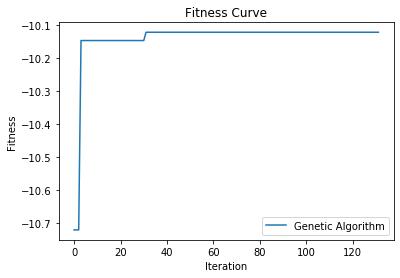

In [15]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Genetic Algorithm")
plt.legend(loc='best')

In [16]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [17]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.11787488554993111
0.020787525140810496


In [18]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'genetic_alg',
                           max_iters = 2000,
                           bias = True,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 5,
                           pop_size = 600,
                           mutation_prob = 0.15,
                           max_attempts = 100,
                           random_state = 1,
                           curve = True)

In [19]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.0001,
              max_iters=2000, mutation_prob=0.15, pop_size=600, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7f1f2c5d4390>)

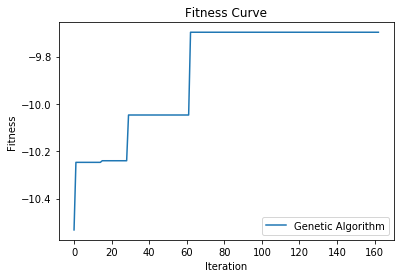

In [20]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Genetic Algorithm")
plt.legend(loc='best')

In [21]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [22]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.20263195094392072
0.2034309533018479


In [23]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'genetic_alg',
                           max_iters = 2000,
                           bias = True,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 5,
                           pop_size = 400,
                           mutation_prob = 0.1,
                           max_attempts = 100,
                           random_state = 1,
                           curve = True)

In [24]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=True, clip_max=5, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.0001,
              max_iters=2000, mutation_prob=0.1, pop_size=400, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7f1f2c5d4390>)

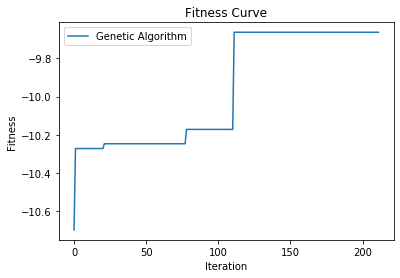

In [25]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Genetic Algorithm")
plt.legend(loc='best')

In [31]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [32]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.02538918428332063
0.03814171848819721


In [33]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'genetic_alg',
                           max_iters = 2000,
                           bias = True,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 5,
                           pop_size = 200,
                           mutation_prob = 0.1,
                           max_attempts = 100,
                           random_state = 1,
                           curve = True)

In [34]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=False, clip_max=10, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.0001,
              max_iters=10000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7f5de9f1b358>)

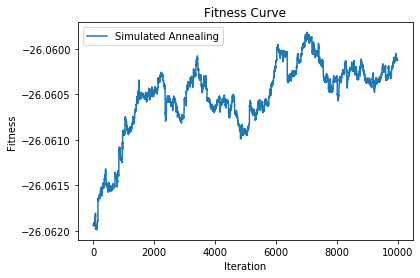

In [35]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Genetic Algorithm")
plt.legend(loc='best')

In [36]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [37]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

-0.03318877252895394
-0.017621244721515678


In [43]:
clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'genetic_alg',
                           max_iters = 2000,
                           bias = True,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 5,
                           pop_size = 200,
                           mutation_prob = 0.1,
                           max_attempts = 100,
                           random_state = 1,
                           curve = True)

In [44]:
clf.fit(X_train_hot, y_train_hot)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[150, 150], is_classifier=True, learning_rate=0.001,
              max_iters=10000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7f5de9f1b358>)

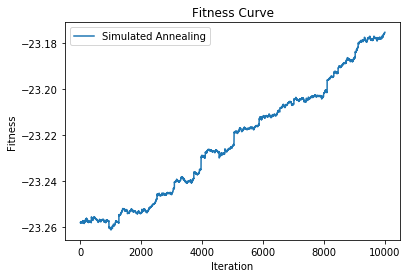

In [45]:
plt.title("Fitness Curve")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(range(len(clf.fitness_curve)), 
         clf.fitness_curve, 
         label="Genetic Algorithm")
plt.legend(loc='best')

In [46]:
y_train_pred = clf.predict(X_train_hot)
y_test_pred = clf.predict(X_test_hot)

In [47]:
print(metrics.matthews_corrcoef(y_train_hot.argmax(axis=1),
                                y_train_pred.argmax(axis=1)))

print(metrics.matthews_corrcoef(y_test_hot.argmax(axis=1),
                                y_test_pred.argmax(axis=1)))

0.02447985652357187
0.03814171848819721


In [ ]:
# Learning Curve
train_sizes= [0.1, 0.2, 0.4, 0.6, 0.8]

clf = mlrose.NeuralNetwork(hidden_nodes = [150,150],
                           activation = 'relu',
                           algorithm = 'genetic_alg',
                           max_iters = 2000,
                           bias = True,
                           is_classifier = True,
                           learning_rate = 0.0001,
                           early_stopping = True,
                           clip_max = 5,
                           pop_size = 200,
                           mutation_prob = 0.1,
                           max_attempts = 100,
                           random_state = 1,
                           curve = True)

train_scores = []
test_scores = []
for x in train_sizes:
    X_train_lc, X_test_lc, y_train_lc, y_test_lc = train_test_split(X_train_hot,
                                                                    y_train_hot,
                                                                    test_size=0.2,
                                                                    train_size=x,
                                                                    random_state = 1)
    clf.fit(X_train_lc, y_train_lc)
    y_train_pred = clf.predict(X_train_lc)
    y_test_pred = clf.predict(X_test_lc)
    train_scores.append(metrics.matthews_corrcoef(y_train_lc.argmax(axis=1),
                                                  y_train_pred.argmax(axis=1)))

    test_scores.append(metrics.matthews_corrcoef(y_test_lc.argmax(axis=1),
                                                 y_test_pred.argmax(axis=1)))

In [ ]:
train_amount = [x * X_train_hot.shape[0] for x in train_sizes]

In [ ]:
plt.title("CARS NN Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("MCC")
plt.plot(train_amount, train_scores, label="Train")
plt.plot(train_amount, test_scores, label="Test")
plt.legend(loc='best')